# Aim 1 Heatmap and Dendrogram

In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing, decomposition, cluster, ensemble, model_selection, metrics
import scipy as sp
from scipy import cluster, spatial
from scipy.spatial import distance
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

/Applications/anaconda/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [3]:
# load in data
data = pd.read_csv('data1.csv')

In [4]:
#create numerical dataframe for further standardization
numerical_data = data.drop(['Amino_acid_substitution', 'Cancer Classification', 'Ensembl_gene_ID'], axis= 1)
numerical_data_std = sklearn.preprocessing.scale(numerical_data)
data.head(4)

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()


,Amino_acid_substitution,Cancer Classification,Ensembl_gene_ID,Length-normalized variant freq,Neoantigen freq,PON-P2_error,PON-P2_predicted_probability,Protein length,Variant freq,Base Pair Substitutions,Pathogenicity Classification,Amino Acid Classification
0,S19N,uterus,ENSG00000000003,0.371429,425.0,0.075,0.411,245.0,91.0,11,0,0
1,G196C,glioma low grade,ENSG00000000003,0.371429,425.0,0.066,0.720,245.0,91.0,10,0,1
2,C177S,ALL,ENSG00000000003,0.371429,425.0,0.092,0.705,245.0,91.0,12,0,0
3,V20I,thyroid,ENSG00000000003,0.371429,425.0,0.030,0.096,245.0,91.0,11,0,0


In [6]:
# Base-Pair Sub Key
key = pd.DataFrame(data = ['None','A to T', 'A to G', 'A to C', 'T to A', 'T to G', 'T to C', 'G to A', 'G to T', 'G to C', 'C to A', 'C to T', 'C to G'], columns = ['Base Pair Substitution'], index  = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
key['Pathogenicity'] = ['Pathogenic', 'Neutral/Unknown', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A']
key['Amino Acid Sub'] = ['None', 'NP neutral to P neutral', 'NP neutral to P acidic', 'NP neutral to P basic', 'P neutral to NP neutral', 'P neutral to P acidic', 'P neutral to P basic', 'P acidic to NP neutral', 'P acidic to P neutral', 'P acidic to P basic', 'P basic to NP neutral', 'P basic to P neutral', 'P basic to P acidic']
key

,Base Pair Substitution,Pathogenicity,Amino Acid Sub
0,None,Pathogenic,None
1,A to T,Neutral/Unknown,NP neutral to P neutral
2,A to G,N/A,NP neutral to P acidic
3,A to C,N/A,NP neutral to P basic
4,T to A,N/A,P neutral to NP neutral
5,T to G,N/A,P neutral to P acidic
6,T to C,N/A,P neutral to P basic
7,G to A,N/A,P acidic to NP neutral
8,G to T,N/A,P acidic to P neutral
9,G to C,N/A,P acidic to P basic


In [8]:
# create a table of frequencies of amino acid substitutions, base pair substitutions and pathogenicity classifications for each cancer type
def dendrogram_data(df, cancer_type):
    num_values = df.loc[df['Cancer Classification'] == cancer_type].shape[0]
    array = []
    for i in range(1,13):
        array.append((data.loc[(data['Cancer Classification'] == cancer_type) & (data['Base Pair Substitutions'] == i)]).shape[0])
    for j in range(1,13):
        array.append((data.loc[(data['Cancer Classification'] == cancer_type) & (data['Amino Acid Classification'] == j)]).shape[0])
    array.append((data.loc[(data['Cancer Classification'] == cancer_type) & (data['Pathogenicity Classification'] == 1)]).shape[0])
    # normalize data for number of data points in each type
    array[:] = [x/num_values for x in array]
    return array

In [9]:
# create a dataframe to store cancer frequencies (call dendrogram data function to calculate frequencies)
import numpy as np
cancer_freq = pd.DataFrame()
cancer_types = ['ALL','AML', 'breast', 'bladder', 'cervix', 'CLL', 'colorectum', 'esophageal', 'glioblastoma', 'glioma low grade', 'head and neck', 'kidney clear cell', 'kidney papillary', 'liver', 'lung adenocarcinoma', 'lung small cell', 'lung squamous', 'medulloblastoma', 'melanoma', 'neuroblastoma', 'ovary', 'pancreas', 'prostate', 'thyroid', 'uterus']
for cancer in cancer_types:
    cancer_freq[cancer] = dendrogram_data(data, cancer)
indices = np.array(['A to T', 'A to G', 'A to C', 'T to A', 'T to G', 'T to C', 'G to A', 'G to T', 'G to C', 'C to A', 'C to T', 'C to G', 'NP neutral to P neutral', 'NP neutral to P acidic', 'NP neutral to P basic', 'P neutral to NP neutral', 'P neutral to P acidic', 'P neutral to P basic', 'P acidic to NP neutral', 'P acidic to P neutral', 'P acidic to P basic', 'P basic to NP neutral', 'P basic to P neutral', 'P basic to P acidic', 'Pathogenic']) 
cancer_freq.set_index(indices)
cancer_freq.to_csv('cancerfreq.csv')

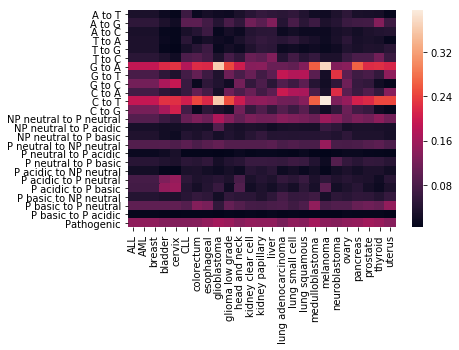

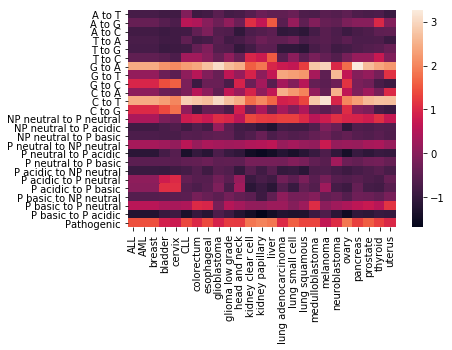

In [10]:
# generate unstandardized and standardized heatmaps
sb.heatmap(cancer_freq, yticklabels = indices)
plt.show()
cancer_freq_std = sklearn.preprocessing.scale(cancer_freq)
cancer_freq_std = pd.DataFrame(data = cancer_freq_std, columns = cancer_freq.columns, index =  cancer_freq.index)
sb.heatmap(cancer_freq_std, yticklabels = indices)
plt.show()

In [12]:
# iterate through various linkage and distance measures to determine which combination results in the most robust copheneitic correlation coefficient
linkages = ['complete', 'average', 'weighted', 'ward']
distances = ['euclidean', 'cityblock', 'cosine', 'correlation', 'hamming', 'jaccard', 'chebyshev', 'canberra']
array = []
for distance in distances:
    for linked in linkages:
        distance_1 = sp.spatial.distance.pdist(cancer_freq_std, metric = distance)
        linked_1 = linkage(cancer_freq_std, method = linked)
        array.append(hierarchy.cophenet(linked_1, distance_1)[0])
array

[0.63175700391591294,
 0.88528272552727205,
 0.87641901259872201,
 0.65905019884842553,
 0.599725274259717,
 0.87220019860959497,
 0.85882755654800558,
 0.63652297057863338,
 0.82746029771924279,
 0.5663050583138457,
 0.63784331901803826,
 0.82934186861417114,
 0.14401224422978284,
 0.15480412512123903,
 0.18556052914398921,
 0.19433571506034605,
 0.26107968169703361,
 0.22050058230328773,
 0.24227007725525035,
 0.24204089388861566,
 0.26107968169703361,
 0.22050058230328773,
 0.24227007725525035,
 0.24204089388861566,
 0.68476247315818961,
 0.82676214514343827,
 0.84197284732409861,
 0.69352273659756847,
 0.78453374496734685,
 0.68917350962069646,
 0.75121319334380887,
 0.84654868252583415]

<Figure size 864x360 with 0 Axes>

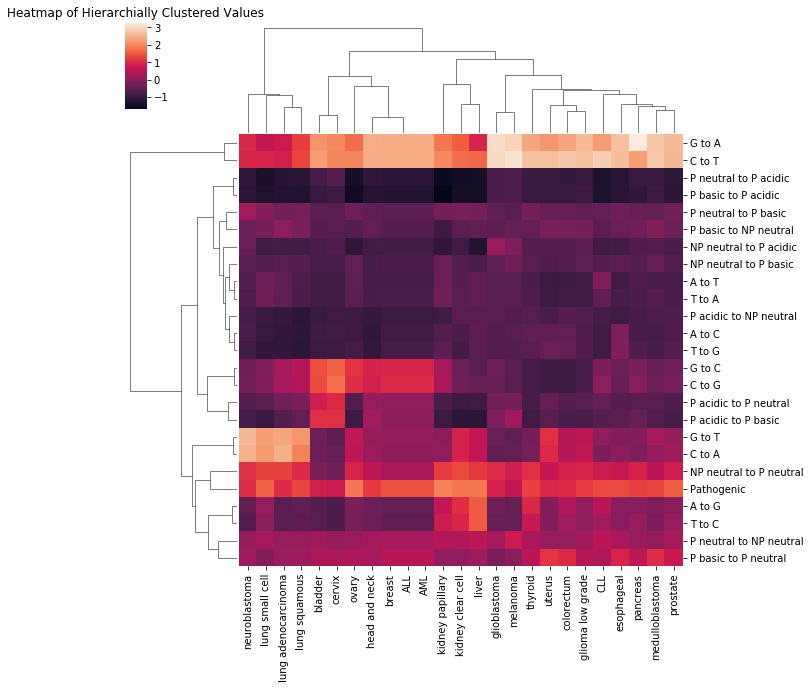

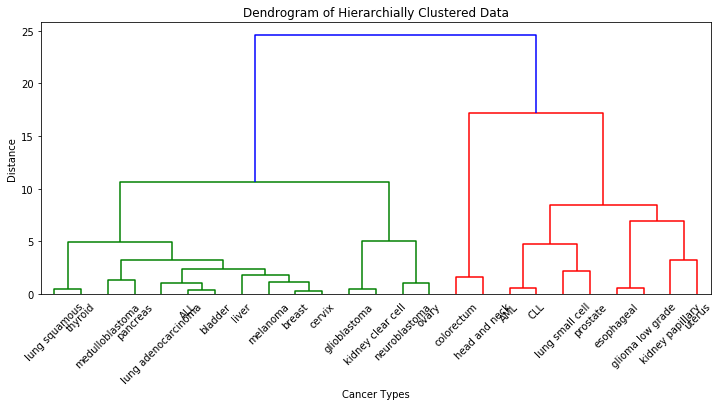

In [46]:
# generate final heatmap with grouped cancer type/parameters
plt.figure(figsize=(12, 5)) 
sb.clustermap(cancer_freq_std, metric = 'euclidean', method = 'average', yticklabels = indices)
plt.title('Heatmap of Hierarchially Clustered Values')
plt.show()

# generate dendrogram to visualize groupings within cancer types 
plt.figure(figsize=(12, 5))  
linked = linkage(cancer_freq_std, 'ward')
labelList = cancer_freq.columns
dendrogram(linked, orientation='top',labels=labelList, distance_sort='descending',show_leaf_counts=True)
plt.xlabel('Cancer Types')
plt.ylabel('Distance')
plt.title('Dendrogram of Hierarchially Clustered Data')
plt.show() 